# Определение успешности компьютерных игр

Магазин Стримчик продаёт видео-игры по всему миру. Нужно выявить определяющие успешность игры закономерности - влияет ли на продажу жанр игры,игровая платформа и регион пользователя. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Из открытых источников доступны исторические данные  до 2016 года (за 2016 год данные могут быть не полными) о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные могут содержать пропуски.

Исследовательский анализ данных включает в себя:

- обзор и предобработку данных
- определение актуального периода для дальнейшего исследования
- определение потенциально-прибыльных плаьформ
- опредеделение потенциально-прибыльных жанров
- определение предпочтений игроков, в зависимости от региона (североамериканский, европейский, японский)
- проверка гипотезы о влияниииплатформы на пользовательский рейтинг
- проверка гипотезы о влиянии жанра игры на пользовательский рейтинг


## Загрузка и обзор данных

Загрузка необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=Warning)

Откроем данные, выведем 5 случайных строк, выведем общую информацию по таблице и проверим на аномалии методом describe:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1868,GRID,PS3,2008.0,Racing,0.31,0.56,0.03,0.20,87.0,8.1,E
13994,Ski-Doo Snowmobile Challenge,X360,2009.0,Racing,0.03,0.00,0.00,0.00,NaN,tbd,E
13006,UEFA Champions League 2006-2007,X360,2007.0,Sports,0.04,0.01,0.00,0.00,72.0,8.2,E
13464,Root Letter,PSV,2016.0,Adventure,0.00,0.03,0.01,0.01,78.0,7.8,M
14740,Mega Minis Volume 2,PSP,2011.0,Misc,0.00,0.02,0.00,0.01,NaN,NaN,NaN


**Вывод:**

Проведём предварительный анализ. Таблица содержит 16715 строк и разбита на 11 столбцов:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

Таблица содержит информацию о продажах и рейтинге для игр, выпущенных с 1980 по 2016 год. 

Перед анализом необходима предобработка даннных:

- названия столбцов превести к нижнему регистру
- разобраться, в причине возникновения пропусков и пути избавления от них
- оптимизировать типы данных


## Предобработка даных:

Приведем названия столбцов к нижнему регистру:

In [4]:
data.columns = [i.lower() for i in list(data.columns)]

Обработаем пропуски. Наши данные взяты из открытых источников, каких - не уточняется. Поэтому пустые значения объясняются неполнотой данных в источниках. подсчитаем количество пропусков по столбцам:

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Выведем строки с пропусками в столбце Name:

In [6]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что эти строки содержат пропуски не только в столбце name,  но и в столбцах жанра и рейтинга. В дальнейшем нам важно определить, как влияет на коммерческий успех игр их жанр и рейтинг. Эти две строки по этим параметром абсолютно неинформативны, поэтому избавимся от них. Это действие разрешит и проблему пропусков в столбце `genre`:

In [7]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Рассмотрим строки с пропусками в столбце `year_of_release`:

In [8]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Некоторые игры содержат в своём названии дату, но нет уверенности, что эта дата соответсвует году релиза, ведь по такой логике, для игры Battlefield 1942 год релиза следует указать как 1942. Строк с пропущенными значениями релиза менее 2%, поэтому избавимся от них, изменим тип данных столбца:

In [9]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype(np.uint16)

Рассмотрим пустые значения в столбце `critic_score`. Вероятно, наш источник данных сайт-агрегатор  Metacritic.com, и если игра не имеет рейтинга критиков, её вероятно, просто нет на этом сайте. Самая низкая оценка, полученная нами методом describe  - 13, присвоим пустым значениям -1 (это будет маркер отсутствия оценки). Шкала ооценки критиков целочисленная, присвоим данным в этом столбце тип int8:

In [10]:
data['critic_score'] = data['critic_score'].fillna(-1).astype(np.int8)

Рассмотрим пустые значения в столбце `user_score`. Вероятно, наш источник также  Metacritic.com, но раздел User Score. Рассмотрим, какие значения принимают данные в этом столбце:

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди рейтинга пользователей встречается оценка 0 и значение tbd - To Be Determined (подлежит определению), что можно интерпретировать как пропущенное значение. Посчитаем число строк со значением tbd и 0:


In [12]:
print('tbd -', data.query('user_score == "tbd"')['user_score'].count())
print('0 -', data.query('user_score == "0"')['user_score'].count())

tbd - 2376
0 - 1


Всего одна игра оказалась оценена пользователями в 0 баллов. Выясним, что это за игра и нет ли здесь ошибки?

In [13]:
data.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2797,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,-1,0,E


В 2021 году на сайте Metacritic.com игра до сих пор имеет статус tbd для оценки критиков, в то время как до 2016 года есть всего одна оценка пользователя, равная 0 баллов из 10. Заполним пропуски значением -1 (как маркер отсутствия оценки пользователей), присвоим данным тип float:

In [14]:
data['user_score'] = data['user_score'].fillna(-1)
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['user_score'] = data['user_score'].astype(float)
data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN


Посмотрим, какой рейтинг ESRB игр в наших данных:      

In [15]:
data['rating'].value_counts()


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Больше всего игр с рейтингом Е(«Everyone») — «Для всех» с 6 лет, «T» («Teen») — «Подросткам» от 13 лет, «M» («Mature») — «Для взрослых» от 17 лет, «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Разберемся с малочисленными категориями: «EC» («Early childhood») — «Для детей младшего возраста» от 3 лет, «K-A» - тоже что и «E»для игр выпущенных до 1996 года, «AO» («Adults Only 18+») - рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.

Категория «RP» - («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Это обозначение похоже по смыслу на tbd, используем его для заполнения пропущенных значений.

In [16]:
data['rating'] = data['rating'].fillna('RP')

Избавимся от микро-категории К-А, присвоив современное значение E:

In [17]:
data.loc[data['rating'] == 'K-A','rating'] = 'E'

Посчитаем суммарные продажи:

In [18]:
data['total_sales'] = data.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [19]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

**Вывод:**

Названия столбцов приведены к нижнему регистру. Удалены строки с пропусками в столбцах `name, year_of_release, genre`. Обнаруженные пропуски в столбцах `critic_score` и `user_score` заполнены маркером -1, в столбце `rating` пропуски заполнены значением «RP» - («Rating Pending») — «Рейтинг ожидается», типы данных оптимизированы. Сумма продаж для каждой игры подссчитана и добавлена в таблицу. 

## Анализ данных

### Определение актуального периода

Определим, как менялось число релизов по годам:

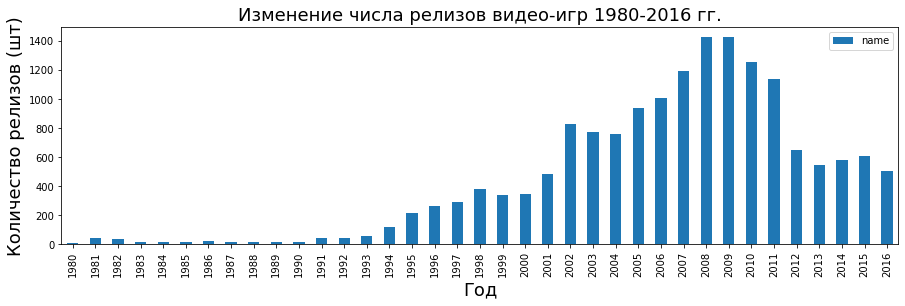

In [20]:
relese = data.groupby('year_of_release').agg({'name':'count'})

relese.plot(y = 'name', kind = 'bar', figsize = (15,4))

plt.ylabel('Количество релизов (шт)', fontsize=18)
plt.xlabel('Год', fontsize=18)
plt.title(
    """Изменение числа релизов видео-игр 1980-2016 гг.""",
    fontsize=18
)
plt.show()

Как видно из диаграммы, пик производства новых игр приходится на 2008-2009 года, а с 2011 года начался резкий спад. 

Определим наиболее успешные платформы:

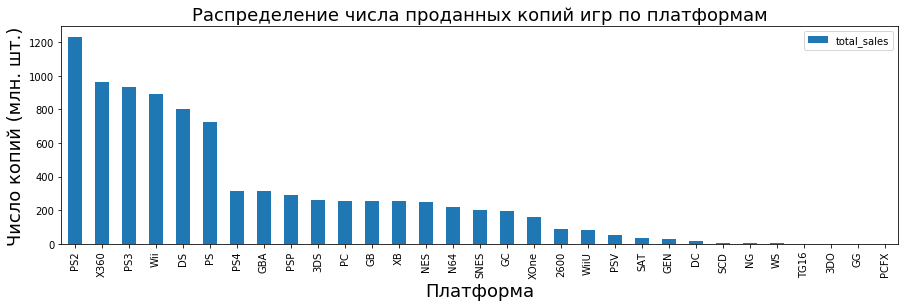

In [21]:
top_platforms = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)
top_platforms.plot(y = 'total_sales', kind = 'bar', figsize = (15,4))
plt.title(
    """Распределение числа проданных копий игр по платформам""",
    fontsize=18
)
plt.ylabel('Число копий (млн. шт.)', fontsize=18)
plt.xlabel('Платформа', fontsize=18)
plt.show()

Если ограничить выборку 6 явными лидерами, то в анализ не войдет относительно новая платформа PS4, поэтому ограничим выборку первыми 9 платформами (платформы GBA и PSP близки по числу проданых копий к PS4):

In [22]:
top_platforms = top_platforms.head(9)

Посмотрим, как распределялась их прибль в течение времени:

In [23]:
top_platforms_relase = data.query('platform in @top_platforms.index').pivot_table(
    index='year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
)

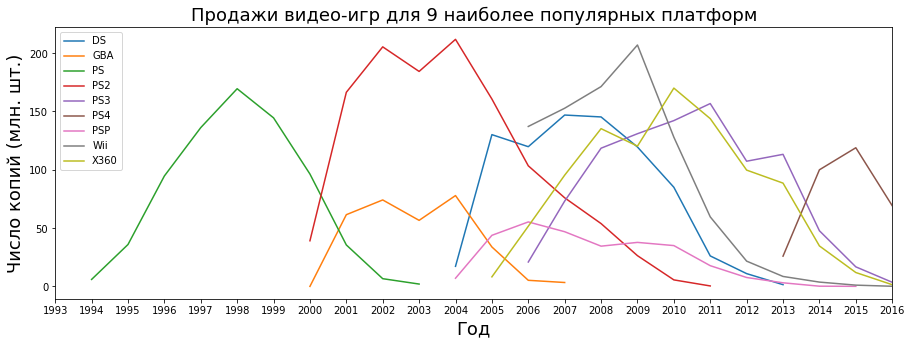

In [24]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(top_platforms_relase)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Число копий (млн. шт.)', fontsize=18)
plt.xlim(1993, 2016)
plt.xlabel('Год', fontsize=18)
plt.title(
    """Продажи видео-игр для 9 наиболее популярных платформ""",
    fontsize=18
)
ax.legend(top_platforms_relase)
plt.show()

Sony безусловный лидер рынка - в топ-9 вошло 5 платформ их производства. Судя по графику, век платформ скоротечен и в среднем составляет 10 лет. Так же мы видим, что в 2013 году вышла последняя успешная платформа. На основании этого, выберем актуальный период в отрезке с 2013 по 2016 год:

In [25]:
actual_data = data.query('year_of_release >= 2013')

**Вывод:**

Как видно из диаграммы, пик производства новых игр приходится на 2008-2009 года, а с 2011 года начался резкий спад. Среди платформ, по числу проданных копий, лидирует PS2. В целом, можно сказать что производитель Sony безусловный лидер рынка - в топ-9 вошло 5 платформ их производства.  Век платформ скоротечен и в среднем составляет 10 лет. Так же мы видим, что в 2013 году вышла последняя успешная платформа - PS4. На основании этого, актуальный период для дальнейшего анализа определим с 2013 по 2016 год.

### Определение потенциально прибыльных платформ

Получим сводную таблицу продаж по годам для выбранного периода:

In [26]:
actual_platform = actual_data.pivot_table(
    index='year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
)

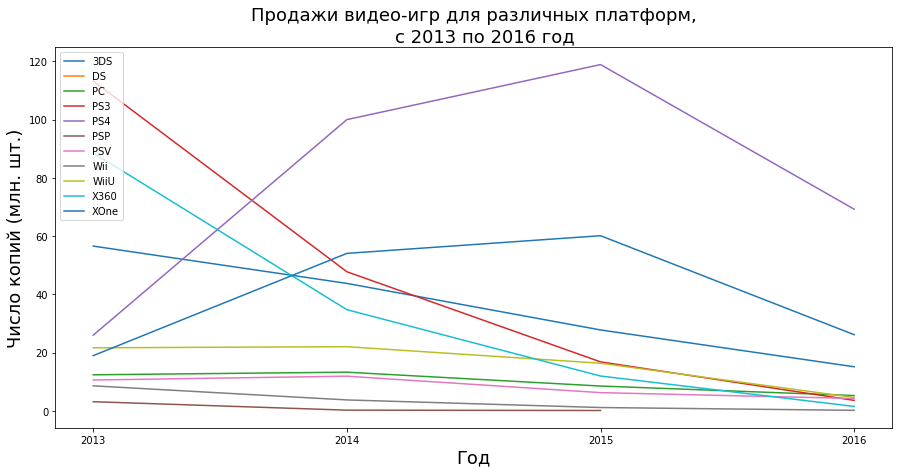

In [27]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.plot(actual_platform)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Число копий (млн. шт.)', fontsize=18)
plt.xlabel('Год', fontsize=18)
plt.title(
    """Продажи видео-игр для различных платформ,
    с 2013 по 2016 год""",
    fontsize=18
)
ax.legend(actual_platform, loc='upper left')
plt.show()

Выход нового поколения платформ сильно влияет на продажи - PS4 приходит на смену PS3, WiiU сменяет Wii, XOne сменяет X360. Покупатели любят не только новинки среди игр, но и среди платформ, поэтому перспективными будем считать платформы PS4, XOne, WiiU. Пользователи PC покупают не так активны в покупках и чаще пользуются "пиратскими" копиями.

Построим диаграмму размаха:

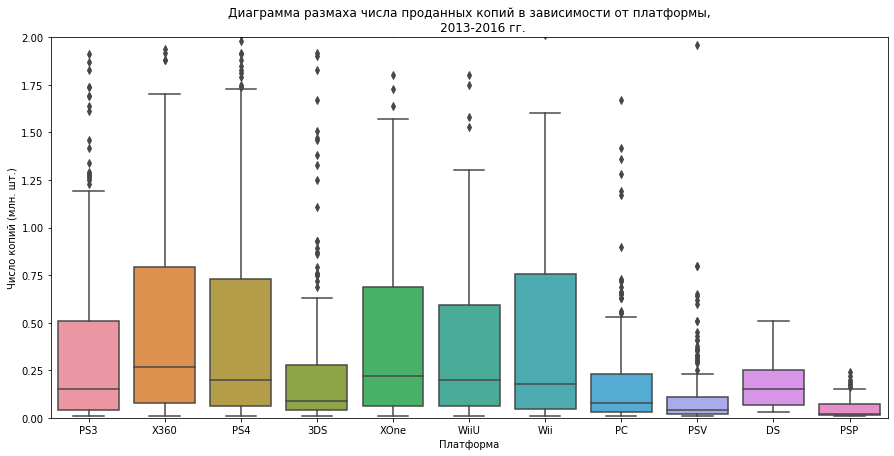

In [28]:
fig, ax = plt.subplots(figsize = (15, 7))
fig = sns.boxplot(x=actual_data['platform'], 
            y=actual_data['total_sales'],
            ax=ax
            )
ax.set(xlabel='Платформа', ylabel= 'Число копий (млн. шт.)')
ax.set(title = '''Диаграмма размаха числа проданных копий в зависимости от платформы,
       2013-2016 гг.''')
ax.set_ylim(0, 2)
plt.show()

Значения, попадающие между первым и третьим квартилем, наиболее равномерно распределены для платформы DS, для остальных платформ медиана смещена к первому квартилю, данные о продажах имеют положительную скошенность. Лидеры по продажам копий - платформы X360, Wii, PS4, XOne, WiiU, учитывая, что за 2016 год данные не окончательные, это соответствует нашему предположению об перспективных платформах.

**Вывод:**

Выход нового поколения платформ сильно влияет на продажи - PS4 приходит на смену PS3, WiiU сменяет Wii, XOne сменяет X360. Для определенного актуального периода, лидеры по продажам копий - платформы X360, Wii, PS4, XOne, WiiU. Покупатели любят не только новинки среди игр, но и среди платформ, поэтому перспективными будем считать платформы PS4, XOne, WiiU. Пользователи PC не так активны в покупках и чаще пользуются "пиратскими" копиями.

### Влияние отзывов критиков и оценок игроков на продажи

Оценим влияние на продажии оценок пользователей и критиков на примере PS4, исключив игры без рейтинга:

In [29]:
data_ps = actual_data.query('platform == "PS4" and critic_score != -1 and user_score != -1')

Построим диаграмму рассеяния и посчитаем корреляцию:

Корреляция между отзывами критиков  и продажами - 0.40589480145836687


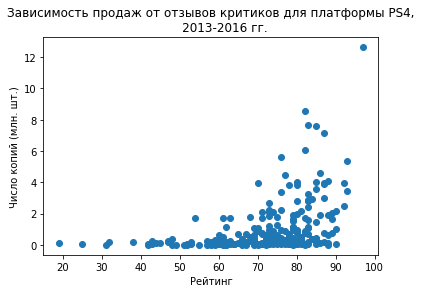

In [30]:
ax = plt.subplot()
plt.scatter(data_ps['critic_score'], 
            data_ps['total_sales']
            )
ax.set(xlabel='Рейтинг', ylabel= 'Число копий (млн. шт.)')
ax.set(title = '''Зависимость продаж от отзывов критиков для платформы PS4,
       2013-2016 гг.''')

print('Корреляция между отзывами критиков  и продажами -', data_ps['critic_score'].corr(data_ps['total_sales']))


Корреляция между отзывами игроков и продажами - -0.03362497596528878


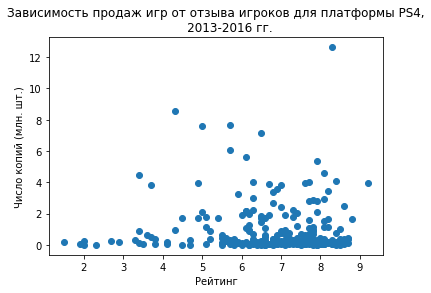

In [31]:
ax = plt.subplot()
plt.scatter(data_ps['user_score'], 
            data_ps['total_sales']
            )
ax.set(xlabel='Рейтинг', ylabel= 'Число копий (млн. шт.)')
ax.set(title = '''Зависимость продаж игр от отзыва игроков для платформы PS4,
       2013-2016 гг.''')

print('Корреляция между отзывами игроков и продажами -', data_ps['user_score'].corr(data_ps['total_sales']))

Корреляция между отзывами критиков и продажами 0.4 - слабая положительная, между продажами и отзывами игроков -0.03 - очень слабая отрицательная. Вероятно, сами игроки больше доверяют мнению критиков при покупке игр.

In [32]:
score_actual_data = actual_data.query('critic_score != -1 and user_score != -1')
for platform in list(actual_data['platform'].unique()):
    user_corr = score_actual_data.query('platform == @platform')['user_score'].corr(score_actual_data['total_sales'])
    critic_corr = score_actual_data.query('platform == @platform')['critic_score'].corr(score_actual_data['total_sales'])
    print(platform)
    print('Корреляция между отзывами игроков и продажами  -', user_corr)
    print('Корреляция между отзывами критиков и продажами -', critic_corr)
    print()

PS3
Корреляция между отзывами игроков и продажами  - 0.02269094327112414
Корреляция между отзывами критиков и продажами - 0.33380663565061736

X360
Корреляция между отзывами игроков и продажами  - -0.006238179532306317
Корреляция между отзывами критиков и продажами - 0.3503445460228664

PS4
Корреляция между отзывами игроков и продажами  - -0.03362497596528878
Корреляция между отзывами критиков и продажами - 0.40589480145836687

3DS
Корреляция между отзывами игроков и продажами  - 0.2729904366942444
Корреляция между отзывами критиков и продажами - 0.3392349287853147

XOne
Корреляция между отзывами игроков и продажами  - -0.09400318326920852
Корреляция между отзывами критиков и продажами - 0.41042203561296375

WiiU
Корреляция между отзывами игроков и продажами  - 0.40869174384926477
Корреляция между отзывами критиков и продажами - 0.37950449899784144

Wii
Корреляция между отзывами игроков и продажами  - nan
Корреляция между отзывами критиков и продажами - nan

PC
Корреляция между отзывам

Для платформ PS4, PS3, X360, XOne, PC отзывы критиков влияют на продажи сильнее, чем оценка пользователей, а для платформ 3DS, WiiU и PSV влияние соизмеримо.  

**Вывод:**

Отзывы критиков имеют большее влияние на продажи, чем отзывы игроков. Вероятно, сами игроки больше доверяют мнению критиков при покупке игр.

### Определение прибыльных жанров

Оценим распределение игр по жанрам:

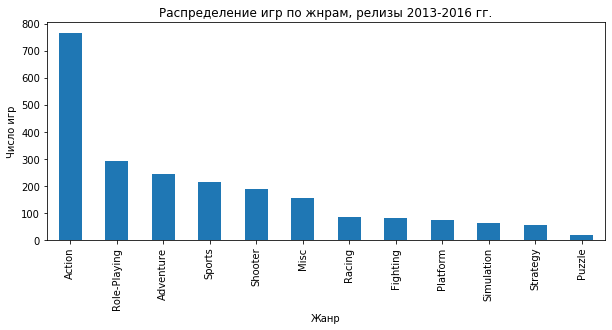

In [33]:
actual_data['genre']
top_genre = actual_data.groupby('genre').agg({'name':'count'}).sort_values(by = 'name', ascending = False)
top_genre.plot(y = 'name', kind = 'bar', figsize = (10,4), legend = False)
plt.title(
    """Распределение игр по жнрам, релизы 2013-2016 гг."""
)
plt.ylabel('Число игр')
plt.xlabel('Жанр')

plt.show()

В выбранном нами периоде 2013-2016 гг. наибольшее число релизов приходится на игры жанра Action, а наименьшее - на жанр Puzzle. Посмотрим, как на распределение продаж по жанрам:

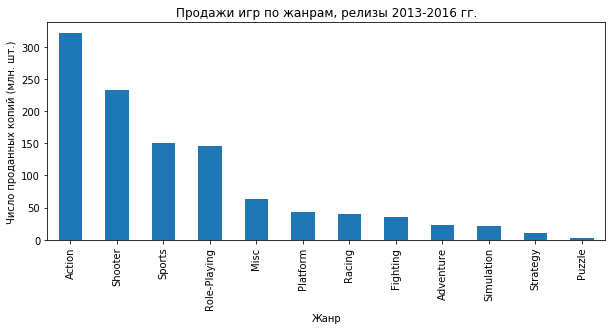

In [34]:
top_genre_sales = actual_data.groupby('genre').agg({'total_sales':'sum'}).sort_values(by = 'total_sales', ascending = False)
top_genre_sales.plot(y = 'total_sales', kind = 'bar', figsize = (10,4), legend = False)
plt.title(
    """Продажи игр по жанрам, релизы 2013-2016 гг."""
)
plt.ylabel('Число проданных копий (млн. шт.)')
plt.xlabel('Жанр')

plt.show()

Жанр Action по прежнему лидирует, по числу проданных копий, за ним следует Shooter. Жанр Adventure спустился к хвосту, а замыкают список игры жанров Strategy и Puzzle. Посмотрим на средние показатели:

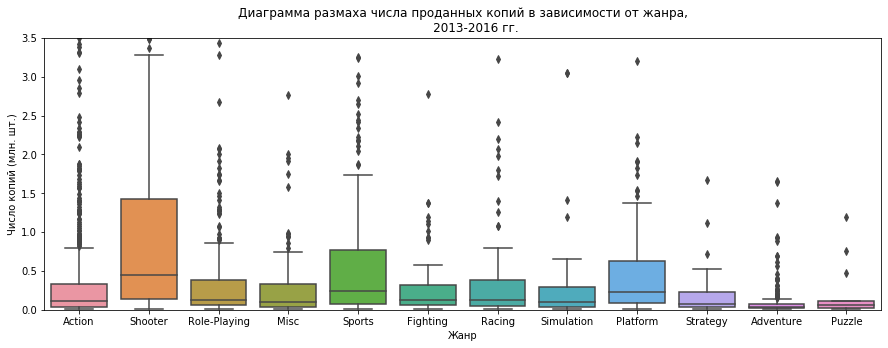

In [35]:
fig, ax = plt.subplots(figsize = (15, 5))
fig = sns.boxplot(x=actual_data['genre'], 
            y=actual_data['total_sales'],
            ax=ax
            )
ax.set(xlabel='Жанр', ylabel= 'Число копий (млн. шт.)')
ax.set(title = '''Диаграмма размаха числа проданных копий в зависимости от жанра,
       2013-2016 гг.''')
ax.set_ylim(0, 3.5)
plt.show()

Наибольшие средние показатели у игр жанра Shooter, также к успешным относятся игры жанра Sports. Хоть число игр-платформеров не велико, средние показатели по продажам приближаются к спортивным. Тиражи копий жанра Action не высокие, но в целом жарн имеет высокие продажи за счет количества выпускаемых игр. Плохо продаются игры жанров Adventure.

**Вывод:**

Выделим жанры с высокими продажами: Shooter, Sports, Platform и Action.
Наибольшие средние показатели у игр жанра Shooter, также к успешным относятся игры жанра Sports. Хоть число игр-платформеров не велико, средние показатели по продажам приближаются к спортивным. Тиражи копий жанра Action не высокие, но в целом жарн имеет высокие продажи за счет количества выпускаемых игр. Плохо продаются игры жанров Adventure. Игр жанра Puzzle выпускают меньше всего и интерес к ним со стороны покупателя низок. 


## Портрет пользователя региона

Определим предпочтения игроков в платформам для различных регионов - Североамериканского, Европейского и Японского:

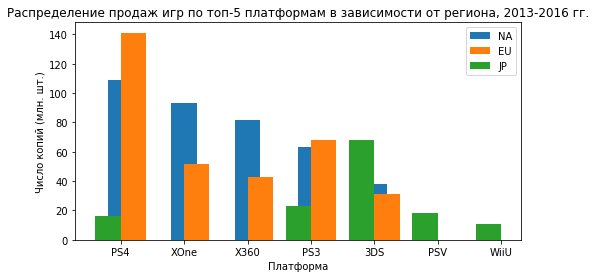

In [36]:
top_platforms_na = actual_data.groupby('platform').agg(
    {'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False).head(5)
top_platforms_eu = actual_data.groupby('platform').agg(
    {'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False).head(5)
top_platforms_jp = actual_data.groupby('platform').agg(
    {'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False).head(5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(width= 0.4, x= top_platforms_na.index, height = top_platforms_na['na_sales'], label = 'NA')
ax.bar(align='edge',width= 0.4, x= top_platforms_eu.index, height = top_platforms_eu['eu_sales'], label = 'EU')
ax.bar(align='edge', width= -0.4, x= top_platforms_jp.index, height = top_platforms_jp['jp_sales'], label = 'JP')

plt.title("""Распределение продаж игр по топ-5 платформам в зависимости от региона, 2013-2016 гг."""
)
plt.ylabel('Число копий (млн. шт.)')
plt.xlabel('Платформа')
ax.legend()
plt.show()

Вкусы игроков североамериканского и европейского регионов схожи - на первом месте PS4, а замыкает Топ-5 платформа 3DS. Но есть и различия - платформы X360 и XOne в Северной Америке популярнее, чем в Европе, где PS3 на втором месте. Предпочтения японцев совсем другие - на первом месте 3DS, PS3 на третьем, а PS4 и вовсе четвертая в рейтинге. При этом платформы PSV(3 в рейтинге японцев) и WiiU и вовсе не вошли в Топ-5 американцев и европейцев.

Посмотрим, как менялись продажи заактуальный период:

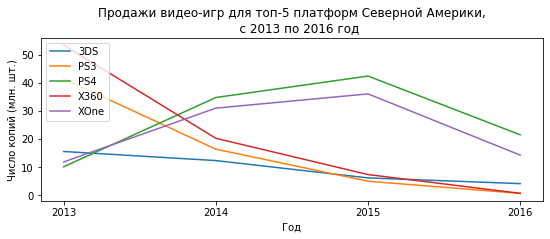

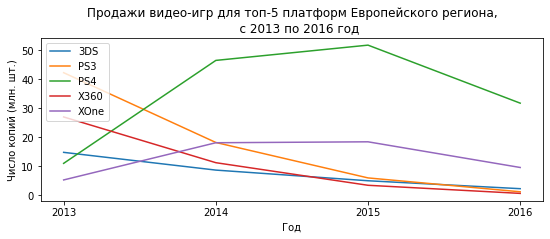

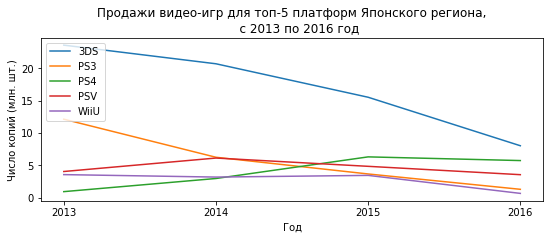

In [37]:
actual_platform_na = actual_data.query('platform in @top_platforms_na.index').pivot_table(
    index='year_of_release',
    columns = 'platform',
    values = 'na_sales',
    aggfunc = 'sum'
)

fig, ax = plt.subplots(figsize = (9, 3))
ax.plot(actual_platform_na)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Число копий (млн. шт.)')
plt.xlabel('Год')
plt.title(
    """Продажи видео-игр для топ-5 платформ Северной Aмерики,
    с 2013 по 2016 год"""
)
ax.legend(actual_platform_na, loc='upper left')
plt.show()

actual_platform_eu = actual_data.query('platform in @top_platforms_eu.index').pivot_table(
    index='year_of_release',
    columns = 'platform',
    values = 'eu_sales',
    aggfunc = 'sum'
)

fig, ax = plt.subplots(figsize = (9, 3))
ax.plot(actual_platform_eu)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Число копий (млн. шт.)')
plt.xlabel('Год')
plt.title(
    """Продажи видео-игр для топ-5 платформ Европейского региона,
    с 2013 по 2016 год"""
)
ax.legend(actual_platform_eu, loc='upper left')
plt.show()

actual_platform_jp = actual_data.query('platform in @top_platforms_jp.index').pivot_table(
    index='year_of_release',
    columns = 'platform',
    values = 'jp_sales',
    aggfunc = 'sum'
)

fig, ax = plt.subplots(figsize = (9, 3))
ax.plot(actual_platform_jp)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('Число копий (млн. шт.)')
plt.xlabel('Год')
plt.title(
    """Продажи видео-игр для топ-5 платформ Японского региона,
    с 2013 по 2016 год"""
)
ax.legend(actual_platform_jp, loc='upper left')
plt.show()

XOne и PS4 набирают обороты по всем регионам, а интерес к 3DS снижается даже в Японии, хотя продажи по прежнему велики. Игры для устаревающих X360, PSV, PS3 ожидаемо продаются хуже. WiiU, которую мы включили в список перспективных платформ, развивается в Японии.

Определим доли для топ-5 платформ по регионамсреди всех продаж. Североамериканский Регион:

In [38]:
top_platforms_na['ratio'] = top_platforms_na['na_sales']/ actual_data['na_sales'].sum()
top_platforms_na = top_platforms_na.style.format({'ratio': '{:.2%}'})
top_platforms_na

,na_sales,ratio
platform,,
PS4,108.74,24.84%
XOne,93.12,21.27%
X360,81.66,18.66%
PS3,63.5,14.51%
3DS,38.2,8.73%


Европейский регион:

In [39]:
top_platforms_eu['ratio'] = top_platforms_eu['eu_sales']/ actual_data['eu_sales'].sum()
top_platforms_eu = top_platforms_eu.style.format({'ratio': '{:.2%}'})
top_platforms_eu

,eu_sales,ratio
platform,,
PS4,141.09,35.97%
PS3,67.81,17.29%
XOne,51.59,13.15%
X360,42.52,10.84%
3DS,30.96,7.89%


Японский регион:

In [40]:
top_platforms_jp['ratio'] = top_platforms_jp['jp_sales']/ actual_data['jp_sales'].sum()
top_platforms_jp = top_platforms_jp.style.format({'ratio': '{:.2%}'})
top_platforms_jp

,jp_sales,ratio
platform,,
3DS,67.81,48.17%
PS3,23.35,16.59%
PSV,18.59,13.21%
PS4,15.96,11.34%
WiiU,10.88,7.73%


3DS, занимающая в Европе и Северной Америке менее 10 % рынка, в Японии неоспоримый лидер - почти половина всех продаж. PS4 в Америке заняла четверть рынка, в Европе треть. 

Определим популярные жанры по регионам:

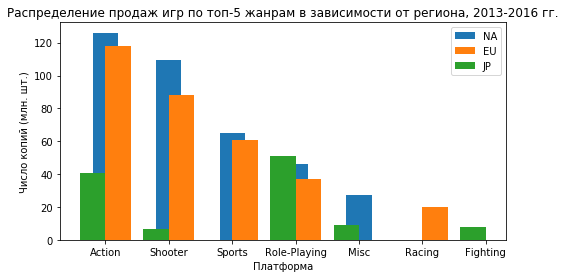

In [41]:
top_genre_na = actual_data.groupby('genre').agg(
    {'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False).head(5)
top_genre_eu = actual_data.groupby('genre').agg(
    {'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending = False).head(5)
top_genre_jp = actual_data.groupby('genre').agg(
    {'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending = False).head(5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(width= 0.4, x= top_genre_na.index, height = top_genre_na['na_sales'], label = 'NA')
ax.bar(align='edge',width= 0.4, x= top_genre_eu.index, height = top_genre_eu['eu_sales'], label = 'EU')
ax.bar(align='edge', width= -0.4, x= top_genre_jp.index, height = top_genre_jp['jp_sales'], label = 'JP')

plt.title("""Распределение продаж игр по топ-5 жанрам в зависимости от региона, 2013-2016 гг."""
)
plt.ylabel('Число копий (млн. шт.)')
plt.xlabel('Платформа')
ax.legend()
plt.show()

In [42]:
top_genre_na['ratio'] = top_genre_na['na_sales']/ actual_data['na_sales'].sum()
top_genre_na = top_genre_na.style.format({'ratio': '{:.2%}'})
top_genre_na

,na_sales,ratio
genre,,
Action,126.05,28.80%
Shooter,109.74,25.07%
Sports,65.27,14.91%
Role-Playing,46.4,10.60%
Misc,27.49,6.28%


In [43]:
top_genre_eu['ratio'] = top_genre_eu['eu_sales']/ actual_data['eu_sales'].sum()
top_genre_eu = top_genre_eu.style.format({'ratio': '{:.2%}'})
top_genre_eu

,eu_sales,ratio
genre,,
Action,118.13,30.12%
Shooter,87.86,22.40%
Sports,60.52,15.43%
Role-Playing,36.97,9.43%
Racing,20.19,5.15%


In [44]:
top_genre_jp['ratio'] = top_genre_jp['jp_sales']/ actual_data['jp_sales'].sum()
top_genre_jp = top_genre_jp.style.format({'ratio': '{:.2%}'})
top_genre_jp

,jp_sales,ratio
genre,,
Role-Playing,51.04,36.26%
Action,40.49,28.76%
Misc,9.2,6.54%
Fighting,7.65,5.43%
Shooter,6.61,4.70%


Вкусы Европейцев и Североамериканцев опять сходятся - наибольший интерес вызывают игры жанра Action, затем Shooter, Sports и RolePlaing. В Европе список замыкает жанр Racing, а в Северной Америке - Misc.

Японцы на первое место поставили жанр RolePlaing - более 36% от общего числа продаж. На втором месте Action, затем Misc, Fighting и Shooter. В топ-5 не вошли спортивные игры.

Определим, как влияет на продажи рейтинг ESBR:

In [45]:
rating_region_sales = actual_data.groupby('rating').agg(
    {'na_sales':'sum'}).sort_values(by = 'na_sales', ascending = False).head(5)

rating_region_sales = actual_data.pivot_table(
    index='rating', 
    values=['na_sales','eu_sales', 'jp_sales'],
    aggfunc={'na_sales' : ['sum', 'count'],
             'eu_sales' : ['sum', 'count'],
             'jp_sales' : ['sum', 'count']}
)

rating_region_sales.columns = ['eu_ratio','eu_sales', 'jp_ratio', 'jp_sales', 'na_ratio','na_sales']
rating_region_sales['eu_ratio'] = rating_region_sales['eu_sales']/ actual_data['eu_sales'].sum()
rating_region_sales['jp_ratio'] = rating_region_sales['jp_sales']/ actual_data['jp_sales'].sum()
rating_region_sales['na_ratio'] = rating_region_sales['na_sales']/ actual_data['na_sales'].sum()

rating_region_sales = rating_region_sales.style.format({'eu_ratio': '{:.2%},',
                                                       'jp_ratio': '{:.2%}',
                                                        'na_ratio': '{:.2%}'})
rating_region_sales


,eu_ratio,eu_sales,jp_ratio,jp_sales,na_ratio,na_sales
rating,,,,,,
E,"21.25%,",83.36,10.75%,15.14,18.06%,79.05
E10+,"10.88%,",42.69,4.18%,5.89,12.39%,54.24
M,"37.05%,",145.32,10.02%,14.11,37.74%,165.21
RP,"20.12%,",78.91,60.41%,85.05,20.43%,89.42
T,"10.70%,",41.95,14.63%,20.59,11.38%,49.79


Не смотря на то, что в Европе существует своё агенство присвоения возрастного рейтинга (PEGI), доли продаж схожи с долями продаж для Североамериканского региона. Игроки отдают своё предпочтение взрослым играм (37% продаж), возможно, что высокий возрастной рейтинг вызывает дополнительный интерес, так как игры для всех(Е) и без оценки(RP) имеют приблизительно одинаковый уровень ~20%, а выделенные в отдельные категории игры E10+ и T(от 10 лет и от 13 лет) в сумме также дадут ~20%.

Японский рынок показывает абсолютно другое распределение - 60% проданных игр не имели оценки ESRB, что объясняется наличием собственной системой возрастного рейтинга CERO. Тем не менее, 15% проданных копий - игры для подростков, 11% - игры для всех, 10 % - игры для взрослых и всего 4% продаж игр для детей от 10 лет.


**Вывод:** Предпочтения пользователей по регионам.

Североамериканский регион. Топ-5 игровых платформ: PS4, XOne, PS3, X360, 3DS. В период с 2013 по 2016гг. интерес к играм на PS3 и X360 падает в связи с выходом обновленных платформ PS4 и XOne. Топ-5 жанров: Action, Shooter, Sports, RolePlaing, Misc. По возрастному рейтингу ESBR 38% проданных игр категории М, игры с рейтингом E - 18%, E10+ - 12%, T - 11 %. Доля продаж игр без оценки возрастного рейтинга - 20%.

Европейский регион: Топ-5 игровых платформ: PS4, PS3, XOne, X360, 3DS. В период с 2013 по 2016гг. интерес к играм на PS3 и X360 падает в связи с выходом обновленных платформ PS4 и XOne. Топ-5 жанров: Action, Shooter, Sports, RolePlaing, Racing. По возрастному рейтингу ESBR 37% проданных игр категории М, игры с рейтингом E - 21%, E10+ - 11%, T - 11 %. Доля продаж игр без оценки возрастного рейтинга - 20%.

Японский регион: Топ-5 игровых платформ:  3DS, PS3, PSV, PS4, WiiU. В период с 2013 по 2016гг. Топ-5 жанров:  RolePlaing, Action, Misc, Fighting, Shooter. По возрастному рейтингу ESBR доля продаж игр без оценки - 60%. 

## Проверка гипотез

### Влияние платформы на пользовательский рейтинг

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC равны. 

Альтернативная гипотеза: Средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC.

Сформируем выборки, исключив игры без пользовательской оценки:

In [46]:
xone = actual_data.query('platform == "XOne" and user_score != -1')['user_score']
pc = actual_data.query('platform == "PC" and user_score != -1')['user_score']

Посчитаем средние значения и дисперсию:

In [47]:
print('Среднее значение пользовательского рейтинга платформы Xbox One',np.mean(xone))
print('Дисперсия', np.var(xone))
print('Среднее значение пользовательского рейтинга платформы PC', np.mean(pc))
print('Дисперсия', np.var(pc))

Среднее значение пользовательского рейтинга платформы Xbox One 6.521428571428572
Дисперсия 1.8965188383045526
Среднее значение пользовательского рейтинга платформы PC 6.2696774193548395
Дисперсия 3.016306347554631


Дисперсия наших выборок отличается. Зададим уровень критической значимости 5%. Достоверность результата- 95%.

In [48]:
alpha = 0.05
results = st.ttest_ind(xone, pc, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вероятность случайного совпадения средних значений пользовательских рейтингов для платформ PC и Xone велика, поэтому не получилось отвергнуть нулевую гипотезу. 

**Вывод:**

Средние пользовательские рейтинги платформ Xbox One и PC равны

### Влияние жанра на пользовательский рейтинг

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports равны. 

Альтернативная гипотеза: Средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингов жанра Sports.

Сформируем выборки, исключив игры без пользовательской оценки:

In [49]:
action = actual_data.query('genre == "Action" and user_score != -1')['user_score']
sports = actual_data.query('genre == "Sports" and user_score != -1')['user_score']

Посчитаем средние значения и дисперсию:

In [50]:
print('Среднее значение пользовательского рейтинга игр жанра Action',np.mean(action))
print('Дисперсия', np.var(action))
print('Среднее значение пользовательского рейтинга игр жанра Sports', np.mean(sports))
print('Дисперсия', np.var(sports))

Среднее значение пользовательского рейтинга игр жанра Action 6.837532133676092
Дисперсия 1.7648124186332366
Среднее значение пользовательского рейтинга игр жанра Sports 5.238124999999999
Дисперсия 3.160733984375


Дисперсия наших выборок отличается. Зададим уровень критической значимости 5%. Достоверность результата- 95%.

In [51]:
alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Случайная вероятность совпадения пользовательских рейтингов для жанров игр Action и Sports чрезвачайно мала, следовательно отвергаем нулевую гипотезу.

**Вывод:**
Средний пользовательский рейтинг игр жанра Action отличается от среднего пользовательского рейтинга игр жанра Sports. 

## Общий вывод

Был проведен исследовательский анализ данных для прогноза успешности продажкомпьютерных игр. Данные получены из открытых источников.

Обнаруженные в данных строки с пустыми значениями в столбцах с названием игры, жанром и годом релиза удалены. Пустые значения в столбцах с рейтингом критиков и пользователей заполнены значением -1. Пустые значения в столбце с возрастным рейтингом заполнены значением RP. Типы данных оптимизированы. В таблицу добавлена общее число продаж копий игры.

Пик производства игр пришелся на 2008-2009 гг., а с 2011 года наблюдается спад числа релизов. Самыми успешными платформами, по числу проданных копий игр, являются  платформы производства Sony - в топ-9 входит 5 платформ этого производдителя. Наибольшее число копий игр продано для платформы PS2. Последняяуспешная платформа выпущенна в 2013 году - PS4. Среднее "время жизни" платформ - 10 лет.

**Определен актуальный период данных для прогноза успешности продаж видео-игр:с 2013 по 2016 гг.** 

Выход нового поколения платформ сильно влияет на продажи - PS4 приходит на смену PS3, WiiU сменяет Wii, XOne сменяет X360. Покупатели любят не только новинки среди игр, но и среди платформ, поэтому перспективными будем считать платформы PS4, XOne, WiiU. Пользователи PC покупают не так активны в покупках и чаще пользуются "пиратскими" копиями.

Отзывы критиков имеют большее влияние на продажи, чем отзывы игроков. Вероятно, сами игроки больше доверяют мнению критиков при покупке игр.

Выделены жанры с высокими продажами: Shooter, Sports, Platform и Action.
Наибольшие средние показатели у игр жанра Shooter, также к успешным относятся игры жанра Sports. Хоть число игр-платформеров не велико, средние показатели по продажам приближаются к спортивным. Тиражи копий жанра Action не высокие, но в целом жарн имеет высокие продажи за счет количества выпускаемых игр. Плохо продаются игры жанров Adventure. Игр жанра Puzzle выпускают меньше всего и интерес к ним со стороны покупателя низок.

Анализ позволил сформировать предпочтения игроков, в зависимости от региона:

**Североамериканский регион:** Топ-5 игровых платформ: PS4, XOne, PS3, X360, 3DS. В период с 2013 по 2016гг. интерес к играм на PS3 и X360 падает в связи с выходом обновленных платформ PS4 и XOne. Топ-5 жанров: Action, Shooter, Sports, RolePlaing, Misc. По возрастному рейтингу ESBR 38% проданных игр категории М, игры с рейтингом E - 18%, E10+ - 12%, T - 11 %. Доля продаж игр без оценки возрастного рейтинга - 20%.

**Европейский регион:** Топ-5 игровых платформ: PS4, PS3, XOne, X360, 3DS. В период с 2013 по 2016гг. интерес к играм на PS3 и X360 падает в связи с выходом обновленных платформ PS4 и XOne. Топ-5 жанров: Action, Shooter, Sports, RolePlaing, Racing. По возрастному рейтингу ESBR 37% проданных игр категории М, игры с рейтингом E - 21%, E10+ - 11%, T - 11 %. Доля продаж игр без оценки возрастного рейтинга - 20%.

**Японский регион:** Топ-5 игровых платформ:  3DS, PS3, PSV, PS4, WiiU. В период с 2013 по 2016гг. Топ-5 жанров:  RolePlaing, Action, Misc, Fighting, Shooter. По возрастному рейтингу ESBR доля продаж игр без оценки - 60%. 

Средние пользовательские рейтинги платформ Xbox One и PC равны.

Средний пользовательский рейтинг игр жанра Action отличается от среднего пользовательского рейтинга игр жанра Sports. 
